## ITEM BASED COLLABORATIVE FILTERING

## A. Using Correlation Matrix

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Step 1. Loading the Dataset

In [3]:
#Adding column names
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

data = pd.read_csv("ml-100k/u.data",sep='\t',names=column_names)

In [4]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
print('Data shape: ',data.shape)
print('Unique Users: ',data['user_id'].nunique())
print('Unique Movies: ',data['item_id'].nunique())

Data shape:  (100000, 4)
Unique Users:  943
Unique Movies:  1682


In [6]:
movies = pd.read_csv('ml-100k/u.item',sep='\|',header=None)

In [7]:
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# We only require the item_id and movie title
movies = movies[[0,1]]

In [9]:
movies.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
movies.columns=['item_id','movie_title']
print('Movie Dataset Shape: ',movies.shape)

Movie Dataset Shape:  (1682, 2)


In [11]:
movies.head(n=20)

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


### Step 2. Merging this data together in one dataframe

- We need to merge the dataframe of user ratings with the movie dataframe
  to associate the item_id with the movie_titles

In [12]:
ratings = pd.merge(data,movies,on='item_id')

In [13]:
ratings.head(n=20)

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


### Step 3. Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

#### ---> Calculate Average Ratings for each movie

In [15]:
avg_ratings = pd.DataFrame(ratings.groupby('movie_title').mean()['rating'])

In [16]:
avg_ratings['no_of_ratings'] = pd.DataFrame(ratings.groupby('movie_title').count()['rating'])

In [17]:
avg_ratings.head(n=10)

,rating,no_of_ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [18]:
avg_ratings.sort_values(by='rating',ascending=True)

,rating,no_of_ratings
movie_title,,
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
Butterfly Kiss (1995),1.0,1
Daens (1992),1.0,1
JLG/JLG - autoportrait de décembre (1994),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1
...,...,...
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
Santa with Muscles (1996),5.0,2


#### --> No of movies vs no of ratings

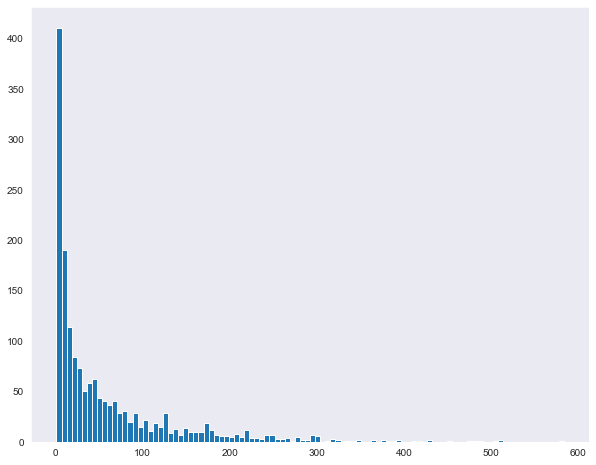

In [19]:
plt.figure(figsize=(10,8))
plt.hist(avg_ratings['no_of_ratings'],bins=100)
plt.show()

- We see that there are many movies which have number of ratings less than 50
- These can put errorneous results in the recommendations because of lack of proper data

#### --> No of movies vs average rating

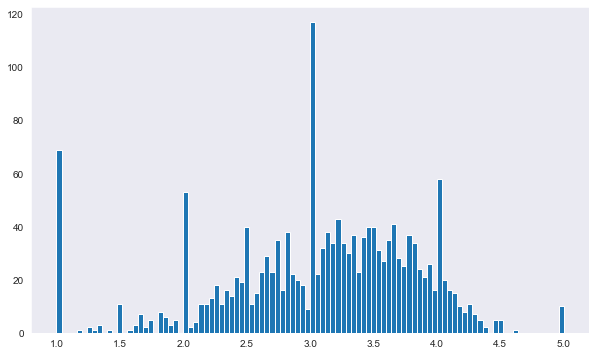

In [20]:
plt.figure(figsize=(10,6))
plt.hist(avg_ratings['rating'],bins=100)
plt.show()

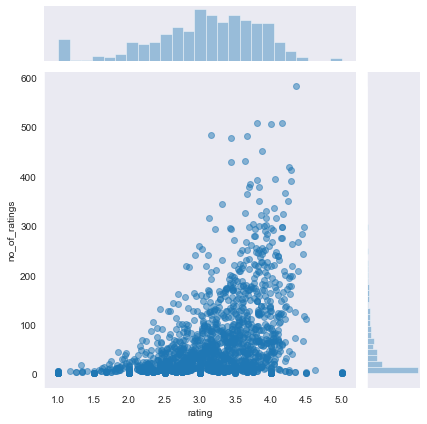

In [21]:
sns.jointplot(x='rating', y='no_of_ratings', data=avg_ratings, alpha=0.5)

Most movies which have good amount of reviews have ratings that fall between 2.5 to 4.5

### Step 4. Creating Recommender System

In [22]:
ratings.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


Create a matrix which stores:
    - user_id as rows and 
    - movies as columns and
    - contains ratings of movies given by the user 

In [23]:
movie_matrix = ratings.pivot_table(index='user_id',columns='movie_title',values='rating')

In [24]:
movie_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [25]:
# NaN values present where user has not watched a particular movie

In [26]:
def recommend_movies(movie_name):
    # create a movie matrix for given movie
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    # correlation matrix
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(avg_ratings['no_of_ratings'])
    
    # recommendations with highest correlation and where ratings > 100 
    recommendations = corr_movie[corr_movie['no_of_ratings']>100].sort_values('Correlation',ascending=False)
    
    return recommendations    

In [27]:
movie_name = input('')

12 Angry Men (1957)


In [28]:
recommendations = recommend_movies(movie_name)

In [29]:
recommendations[1:10]

,Correlation,no_of_ratings
movie_title,,
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148
Singin' in the Rain (1952),0.520844,137
Vertigo (1958),0.509460,179
Army of Darkness (1993),0.477251,116
Mr. Smith Goes to Washington (1939),0.470078,105
"First Wives Club, The (1996)",0.466773,160
